파이썬에서 쉘 명령어를 이용하여 파일을 만드는 방법은 
1. echo 명령어와 파이프 연산자를 이용하는 방법
2. touch 명령어를 이용하여 파일을 생성하는 방법
두 가지가 있다.

In [2]:
!echo "This is a first test of a python script" >> ./test.txt

In [3]:
!ls

001_fileIO.ipynb
001_fileIO.py
test.txt


In [4]:
!touch test2.txt
!ls

001_fileIO.ipynb
001_fileIO.py
test.txt
test2.txt


파이썬 실행 중 시스템 명령어를 이용하여 수행할 수 있는 작업을 알아보자.   
업무 자동화 뿐만 아니라 다양한 작업 과정에서 직접 시스템 명령어를 이용해야 하는 경우들이 있기 때문에 이번 기회에 정리해두자.
관련된 라이브러리는 다음과 같이 세 가지가 있다. 
* os 모듈 - 기본적인 시스템 명령어 실행 및 파일 시스템 조작
* subprocess 모듈 - 외부 프로세스 실행 및 입출력 제어
* shutil 모듈 - 고수준 파일/디렉토리 조작 및 시스템 명령어 

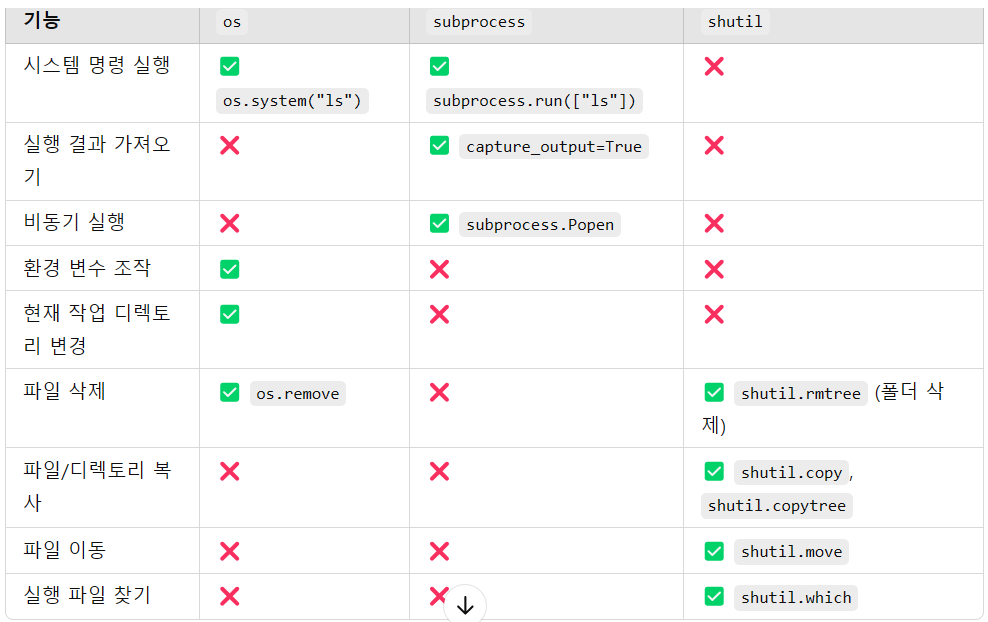

In [13]:
import os
print(os.system("ls"))

0


os.system('ls') - 명령을 이용하는 경우 성공하면 0, 실패하면 1만 반환한다. 

In [14]:
import subprocess

subprocess.run("ls", shell=True)  # 또는 "dir" (Windows)


CompletedProcess(args='ls', returncode=0)

In [17]:
import subprocess

result = subprocess.run("ls", shell=True, capture_output=True, text=True)
print(result)  # 결과 반환하기기
print(result.stdout)  # 표준 출력 가져오기

CompletedProcess(args='ls', returncode=0, stdout='001_fileIO.ipynb\n001_fileIO.py\ntest1.txt\ntest3.txt\n', stderr='')
001_fileIO.ipynb
001_fileIO.py
test1.txt
test3.txt



In [18]:
result = subprocess.run("ls ./test", shell=True, capture_output=True, text=True)
print(result.stdout)  # 표준 출력 가져오기
print(result.stderr)  # 표준 에러 가져오기


ls: cannot access './test': No such file or directory



시스템 명령어를 이용하는 이유는 시스템의 각종 정보를 얻을 수 있다는 점에 있다. 이러한 정보를 이용하는 방법을 알아두자.

[시스템 환경 변수 알아보기]

In [19]:
import os

print(os.environ["HOME"])  # 환경 변수 가져오기

C:\Users\domam


In [24]:
# 환경 변수 설정
os.environ["MY_NAME"] = "domafordarwin"
print(os.environ.keys())

KeysView(environ({'ADD_PATH': 'C:\\WorkSpace\\01_Programing\\cmder', 'ADD_TO_PATH': 'C:\\WorkSpace\\01_Programing\\cmder', 'ALIASES': 'C:\\WorkSpace\\01_Programing\\cmder\\config\\user_aliases.cmd', 'ALLUSERSPROFILE': 'C:\\ProgramData', 'ANSICON': '254x1000 (254x65)', 'ANSICON_DEF': '7', 'APPDATA': 'C:\\Users\\domam\\AppData\\Roaming', 'APPLICATIONINSIGHTS_CONFIGURATION_CONTENT': '{}', 'APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL': '1', 'ARCHITECTURE_BITS': '64', 'CCALL': 'call "C:\\WorkSpace\\01_Programing\\cmder\\vendor\\bin\\cexec.cmd"', 'CEXEC': '"C:\\WorkSpace\\01_Programing\\cmder\\vendor\\bin\\cexec.cmd"', 'CHOCOLATEYINSTALL': 'C:\\ProgramData\\chocolatey', 'CHOCOLATEYLASTPATHUPDATE': '133272117274005451', 'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\crashpad_6572_CVKNNVDGMLSEFJLW', 'CLINK_ARCHITECTURE': 'x64', 'CLINK_COMPLETIONS_DIR': 'C:\\WorkSpace\\01_Programing\\cmder/vendor/clink-completions/completions', 'CLINK_DUMMY_CAPTURE_ENV': ' ', 'CMDER_ALIASES': '1', 'CMDER_CLINK': '1'

In [25]:
import os

print(list(os.environ))  # ['HOME', 'PATH', 'MY_NAME', ...]


['ADD_PATH', 'ADD_TO_PATH', 'ALIASES', 'ALLUSERSPROFILE', 'ANSICON', 'ANSICON_DEF', 'APPDATA', 'APPLICATIONINSIGHTS_CONFIGURATION_CONTENT', 'APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL', 'ARCHITECTURE_BITS', 'CCALL', 'CEXEC', 'CHOCOLATEYINSTALL', 'CHOCOLATEYLASTPATHUPDATE', 'CHROME_CRASHPAD_PIPE_NAME', 'CLINK_ARCHITECTURE', 'CLINK_COMPLETIONS_DIR', 'CLINK_DUMMY_CAPTURE_ENV', 'CMDER_ALIASES', 'CMDER_CLINK', 'CMDER_CONFIGURED', 'CMDER_CONFIG_DIR', 'CMDER_INIT_END', 'CMDER_INIT_START', 'CMDER_ROOT', 'CMDER_SHELL', 'CMDER_USER_FLAGS', 'COLUMNS', 'COMMONPROGRAMFILES', 'COMMONPROGRAMFILES(X86)', 'COMMONPROGRAMW6432', 'COMPUTERNAME', 'COMSPEC', 'CONDA_DEFAULT_ENV', 'CONDA_EXE', 'CONDA_EXES', 'CONDA_PREFIX', 'CONDA_PROMPT_MODIFIER', 'CONDA_PYTHON_EXE', 'CONDA_SHLVL', 'CONEMUANSI', 'CONEMUARGS', 'CONEMUBACKHWND', 'CONEMUBASEDIR', 'CONEMUBASEDIRSHORT', 'CONEMUBUILD', 'CONEMUCFGDIR', 'CONEMUDIR', 'CONEMUDRAWHWND', 'CONEMUDRIVE', 'CONEMUHOOKS', 'CONEMUHWND', 'CONEMUPALETTE', 'CONEMUPID', 'CONEMUSER

In [26]:
import os

for key in os.environ:
    print(key)


ADD_PATH
ADD_TO_PATH
ALIASES
ALLUSERSPROFILE
ANSICON
ANSICON_DEF
APPDATA
APPLICATIONINSIGHTS_CONFIGURATION_CONTENT
APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL
ARCHITECTURE_BITS
CCALL
CEXEC
CHOCOLATEYINSTALL
CHOCOLATEYLASTPATHUPDATE
CHROME_CRASHPAD_PIPE_NAME
CLINK_ARCHITECTURE
CLINK_COMPLETIONS_DIR
CLINK_DUMMY_CAPTURE_ENV
CMDER_ALIASES
CMDER_CLINK
CMDER_CONFIGURED
CMDER_CONFIG_DIR
CMDER_INIT_END
CMDER_INIT_START
CMDER_ROOT
CMDER_SHELL
CMDER_USER_FLAGS
COLUMNS
COMMONPROGRAMFILES
COMMONPROGRAMFILES(X86)
COMMONPROGRAMW6432
COMPUTERNAME
COMSPEC
CONDA_DEFAULT_ENV
CONDA_EXE
CONDA_EXES
CONDA_PREFIX
CONDA_PROMPT_MODIFIER
CONDA_PYTHON_EXE
CONDA_SHLVL
CONEMUANSI
CONEMUARGS
CONEMUBACKHWND
CONEMUBASEDIR
CONEMUBASEDIRSHORT
CONEMUBUILD
CONEMUCFGDIR
CONEMUDIR
CONEMUDRAWHWND
CONEMUDRIVE
CONEMUHOOKS
CONEMUHWND
CONEMUPALETTE
CONEMUPID
CONEMUSERVERPID
CONEMUTASK
CONEMUWORKDIR
CONEMUWORKDRIVE
CUDA_PATH
CUDA_PATH_V12_3
CURRENARGU
DEBUG_OUTPUT
DEPTH
DRIVERDATA
EFC_11108
ELECTRON_NO_ATTACH_CONSOLE
ELECTRON_RUN

In [27]:
import os
print(os.environ.get("AWS_SECRET_ACCESS_KEY"))  # 노출 위험!


None


환경 변수를 간단한 파이썬 프로그램으로 읽어낼 수 있다면, 큰 문제가 아닌가? 이에 대한 보안에 대해서도 찾아봐야 겠다.

In [33]:
# 환경 변수를 오늘 날짜로 백업하는 프로그램 코드
import os
import datetime
import json # JSON 형식으로 저장하기 위해 json 모듈을 import

# 환경 변수를 저장할 파일 이름
filename = "env_backup_" + datetime.datetime.now().strftime("%Y%m%d%H%M%S") + ".json"

# 환경 변수를 JSON 형식으로 변환
env_json = json.dumps(dict(os.environ), indent=2)

# JSON 파일로 저장
with open(filename, "w") as f:
    f.write(env_json)

print("환경 변수를 백업했습니다. 파일명:", filename)

환경 변수를 백업했습니다. 파일명: env_backup_20250131204221.json


디렉토리 확인 및 변경 등의 기본적인 작업하기

In [30]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 확인

os.mkdir("../00_env_backup")  # 디렉토리 생성

os.listdir()  # 현재 디렉토리 목록 확인

c:\WorkSpace\myWork\01_biopy\01_파이썬_기초


['001_fileIO.ipynb',
 '001_fileIO.py',
 'env_backup_20250131202927.json',
 'env_backup_20250131203010.json',
 'test1.txt',
 'test3.txt']

In [44]:
import os
print(os.path.exists("test1.txt"))  # 파일 존재 여부 확인
print(os.path.isfile("../00_env_backup"))  # 파일인지 확인
print(os.path.isdir("../00_env_backup"))  # 디렉토리인지 확인
path_00 = os.path.join("../00_env_backup", "test1.txt")
print(os.path.exists(path_00))  # 파일 존재 여부 확인
!touch ../00_env_backup/test1.txt
print(os.path.exists(path_00))  # 파일 존재 여부 확인



True
False
True
False
True


In [31]:
# 현재 디렉토리에 env로 시작하는 jsom 파일이 있다면 상위 디렉토리인 00_env_backup 디렉토리로 이동하는 코드
import os
import shutil

# 대상 디렉토리 경로
source_dir = os.getcwd()
target_dir = "../00_env_backup"

# 대상 디렉토리가 없으면 생성
if not os.path.exists(target_dir):
    os.mkdir(target_dir)

#  env로 시작하는 파일 목록 가져오기
for filename in os.listdir(source_dir):
    if filename.startswith("env") and filename.endswith(".json"):
        # 파일을 대상 디렉토리로 이동
        shutil.move(os.path.join(source_dir, filename), os.path.join(target_dir, filename))

print("모든 환경 설정 Json 파일을 00_env_backup 디렉토리로 이동했습니다.")

print(os.listdir(target_dir))  # 이동된 파일 확인


모든 환경 설정 Json 파일을 00_env_backup 디렉토리로 이동했습니다.
['env_backup_20250131202927.json', 'env_backup_20250131203010.json']


In [45]:
import shutil
print(shutil.which("python"))  # 실행 가능한 Python 경로 출력

c:\Users\domam\miniconda3\envs\biopy\python.EXE


In [34]:
# glob 모듈을 사용하여 위와 동일한 기능을 하는 코드 구현하기
import os
import shutil
import glob

# 대상 디렉토리 경로
source_dir = os.getcwd()
target_dir = "../00_env_backup"

# 대상 디렉토리가 없으면 생성
if not os.path.exists(target_dir):
    os.mkdir(target_dir)

# env로 시작하는 모든 JSON 파일 찾기
env_files = glob.glob(os.path.join(source_dir, "env*.json"))

# 파일 이동
for file in env_files:
    shutil.move(file, target_dir)
    print(f"Moved: {file} -> {target_dir}")

print("모든 env JSON 파일 이동 완료!")

# 이동된 파일 확인, 총 몇 개의 파일이 이동했고 총 몇개의 파일이 있는지 확인
print(os.listdir(target_dir))  # 이동된 파일 확인
print(f"이동된 파일 수: {len(os.listdir(target_dir))}개")
print(f"전체 파일 수: {len(os.listdir(source_dir))}개")



Moved: c:\WorkSpace\myWork\01_biopy\01_파이썬_기초\env_backup_20250131204217.json -> ../00_env_backup
Moved: c:\WorkSpace\myWork\01_biopy\01_파이썬_기초\env_backup_20250131204221.json -> ../00_env_backup
모든 env JSON 파일 이동 완료!
['env_backup_20250131202927.json', 'env_backup_20250131203010.json', 'env_backup_20250131204217.json', 'env_backup_20250131204221.json']
이동된 파일 수: 4개
전체 파일 수: 4개


In [35]:
!ls

001_fileIO.ipynb
001_fileIO.py
test1.txt
test3.txt


현재 실행되고 있는 프로세스를 확인하고 관리할 수도 있다.

In [36]:
import os

print(os.getpid())  # 현재 프로세스 ID 출력
print(os.getppid())  # 부모 프로세스 ID 출력


3936
11364


In [46]:
import os
print(os.getlogin())  # 현재 로그인된 사용자 출력


domam


### subprocess 모듈: 외부 프로세스 실행 및 입출력 제어 가능함함

In [54]:
# 기본 명령어 실행(subprocess.run)
import subprocess

result = subprocess.run("ls", shell=True)
print(result)  # CompletedProcess 객체 출력
print(result.returncode)  # 종료 코드 출력
print(result.stdout)  # 표준 출력 가져오기

CompletedProcess(args='ls', returncode=0)
0
None


In [55]:
import subprocess

# 표준 출력을 가져오기 위해 capture_output=True, 텍스트로 변환하기 위해 text=True
result = subprocess.run("ls", shell=True, capture_output=True, text=True) 
print(result.stdout)  # 표준 출력 가져오기


001_fileIO.ipynb
001_fileIO.py
test1.txt
test3.txt



In [56]:
import subprocess

result = subprocess.run("ls non_existing_file", shell=True, capture_output=True, text=True)
print(result.returncode)  # 반환 코드 (0: 성공, 1 이상: 실패)
print(result.stderr)  # 에러 메시지 출력


2
ls: cannot access 'non_existing_file': No such file or directory



✅ popen()을 이용하면 다중 작업이 가능해짐  
subprocess.run() → 동기 실행 (Python이 외부 명령이 끝날 때까지 기다림)  
subprocess.Popen() → 비동기 실행 (외부 명령을 실행하고 Python이 다른 작업을 계속 진행)

In [61]:
import subprocess

print("명령어 실행 시작")

# ping 명령 실행 및 결과 저장
result = subprocess.run(["ping", "-n", "4", "google.com"], capture_output=True, text=True)

# 실행된 결과 출력
print(result.stdout)

print("명령어 실행 종료")


명령어 실행 시작

Ping google.com [142.250.198.14] 32바이트 데이터 사용:
142.250.198.14의 응답: 바이트=32 시간=68ms TTL=111
142.250.198.14의 응답: 바이트=32 시간=74ms TTL=111
142.250.198.14의 응답: 바이트=32 시간=66ms TTL=111
142.250.198.14의 응답: 바이트=32 시간=73ms TTL=111

142.250.198.14에 대한 Ping 통계:
    패킷: 보냄 = 4, 받음 = 4, 손실 = 0 (0% 손실),
왕복 시간(밀리초):
    최소 = 66ms, 최대 = 74ms, 평균 = 70ms

명령어 실행 종료


In [69]:
import subprocess
import time
import threading

def read_output(process):
    """실시간으로 프로세스의 stdout을 읽어서 출력하는 함수"""
    while True:
        output = process.stdout.readline()
        if output == "" and process.poll() is not None:
            break
        if output:
            print(output.strip())

print("명령어 실행 시작")

# 비동기 실행 (ping 명령 실행)
process = subprocess.Popen(["ping", "-n", "4", "google.com"], stdout=subprocess.PIPE, text=True)

# 별도의 스레드에서 ping 결과를 출력 (실시간으로)
thread = threading.Thread(target=read_output, args=(process,))
thread.start()

# 명령 실행 중에도 다른 작업 수행
for i in range(10):
    print(f"다른 작업 중... {i}")
    time.sleep(1)

# ping 프로세스가 끝날 때까지 대기
thread.join()

print("명령어 실행 종료")



명령어 실행 시작
다른 작업 중... 0

Ping google.com [142.250.199.110] 32바이트 데이터 사용:
142.250.199.110의 응답: 바이트=32 시간=95ms TTL=111
다른 작업 중... 1
142.250.199.110의 응답: 바이트=32 시간=87ms TTL=111
다른 작업 중... 2
142.250.199.110의 응답: 바이트=32 시간=80ms TTL=111
다른 작업 중... 3
142.250.199.110의 응답: 바이트=32 시간=107ms TTL=111

142.250.199.110에 대한 Ping 통계:
패킷: 보냄 = 4, 받음 = 4, 손실 = 0 (0% 손실),
왕복 시간(밀리초):
최소 = 80ms, 최대 = 107ms, 평균 = 92ms
다른 작업 중... 4
다른 작업 중... 5
다른 작업 중... 6
다른 작업 중... 7
다른 작업 중... 8
다른 작업 중... 9
명령어 실행 종료
